# Decision Tree Classification for ActiveMQ 5.0.0 Dataset

This notebook implements Decision Tree classification on the HCBOU-balanced ActiveMQ dataset for software defect prediction.

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Load HCBOU-Balanced Dataset

In [3]:
# Load training data (balanced and scaled)
X_train = pd.read_csv('activemq-5.0.0-hcbou-train-features-balanced-scaled.csv')
y_train = pd.read_csv('activemq-5.0.0-hcbou-train-labels-balanced.csv')['class']

# Load test data (scaled)
X_test = pd.read_csv('activemq-5.0.0-hcbou-test-features-scaled.csv')
y_test = pd.read_csv('activemq-5.0.0-hcbou-test-labels.csv')['RealBug']

print(f"Training set shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

print(f"\nTraining set class distribution:")
print(y_train.value_counts())

print(f"\nTest set class distribution:")
print(y_test.value_counts())

Training set shape: (1506, 65)
Training labels shape: (1506,)
Test set shape: (377, 65)
Test labels shape: (377,)

Training set class distribution:
class
False    753
True     753
Name: count, dtype: int64

Test set class distribution:
RealBug
False    318
True      59
Name: count, dtype: int64


## Decision Tree Model Implementation

In [12]:
# Initialize Decision Tree with default parameters
dt_model = DecisionTreeClassifier(random_state=42)

print("Decision Tree Model Configuration:")
print(f"Algorithm: Decision Tree Classifier")
print(f"Criterion: {dt_model.criterion}")
print(f"Max depth: {dt_model.max_depth}")
print(f"Min samples split: {dt_model.min_samples_split}")
print(f"Min samples leaf: {dt_model.min_samples_leaf}")
print(f"Random state: {dt_model.random_state}")

Decision Tree Model Configuration:
Algorithm: Decision Tree Classifier
Criterion: gini
Max depth: None
Min samples split: 2
Min samples leaf: 1
Random state: 42


## Model Training

In [13]:
# Train the Decision Tree model
print("Training Decision Tree model...")
dt_model.fit(X_train, y_train)
print("Training completed!")

print(f"\nModel trained on {X_train.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")
print(f"Number of classes: {dt_model.n_classes_}")
print(f"Classes: {dt_model.classes_}")
print(f"\nTree Structure:")
print(f"- Tree depth: {dt_model.tree_.max_depth}")
print(f"- Number of leaves: {dt_model.tree_.n_leaves}")
print(f"- Total nodes: {dt_model.tree_.node_count}")

Training Decision Tree model...
Training completed!

Model trained on 1506 samples
Number of features: 65
Number of classes: 2
Classes: [False  True]

Tree Structure:
- Tree depth: 15
- Number of leaves: 137
- Total nodes: 273


## Model Evaluation

In [14]:
# Generate predictions
y_pred = dt_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=True)
recall = recall_score(y_test, y_pred, pos_label=True)
f1 = f1_score(y_test, y_pred, pos_label=True)

print("Decision Tree Performance Metrics:")
print("=" * 40)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

Decision Tree Performance Metrics:
Accuracy:  0.8462
Precision: 0.5063
Recall:    0.6780
F1-Score:  0.5797


In [15]:
# Detailed classification report
print("\nDetailed Classification Report:")
print("=" * 50)
print(classification_report(y_test, y_pred))


Detailed Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.88      0.91       318
        True       0.51      0.68      0.58        59

    accuracy                           0.85       377
   macro avg       0.72      0.78      0.74       377
weighted avg       0.87      0.85      0.85       377



## Confusion Matrix

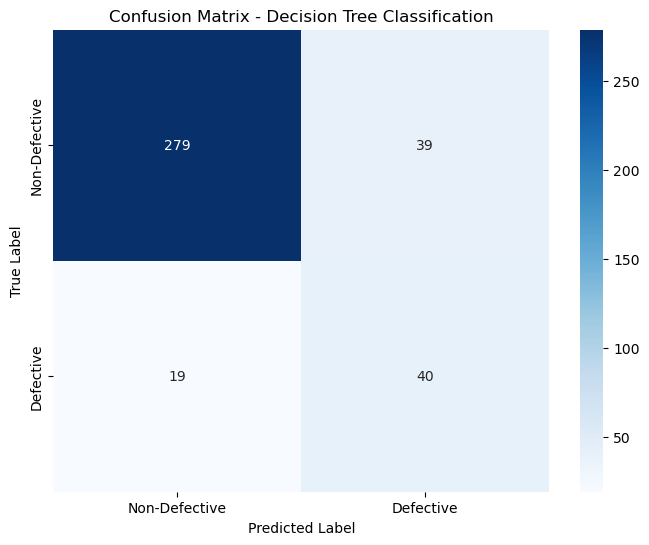


Confusion Matrix:
True Label vs Predicted Label
                 Non-Defective  Defective
Non-Defective         279          39    
Defective             19           40    


In [16]:
# Generate and display confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Defective', 'Defective'],
            yticklabels=['Non-Defective', 'Defective'])
plt.title('Confusion Matrix - Decision Tree Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nConfusion Matrix:")
print("True Label vs Predicted Label")
print(f"                 Non-Defective  Defective")
print(f"Non-Defective    {cm[0,0]:^13}  {cm[0,1]:^9}")
print(f"Defective        {cm[1,0]:^13}  {cm[1,1]:^9}")

## Feature Importance Analysis

Top 15 Most Important Features:
OWN_COMMIT                     0.4318
Added_lines                    0.0598
CountLineBlank                 0.0554
CountLineCodeDecl              0.0366
AvgLineCode                    0.0320
CountLineComment               0.0278
OWN_LINE                       0.0261
AvgLine                        0.0251
Del_lines                      0.0195
CountStmtDecl                  0.0160
CountLine                      0.0142
MaxNesting_Mean                0.0141
CountInput_Mean                0.0135
CountPath_Max                  0.0135
AvgLineBlank                   0.0123


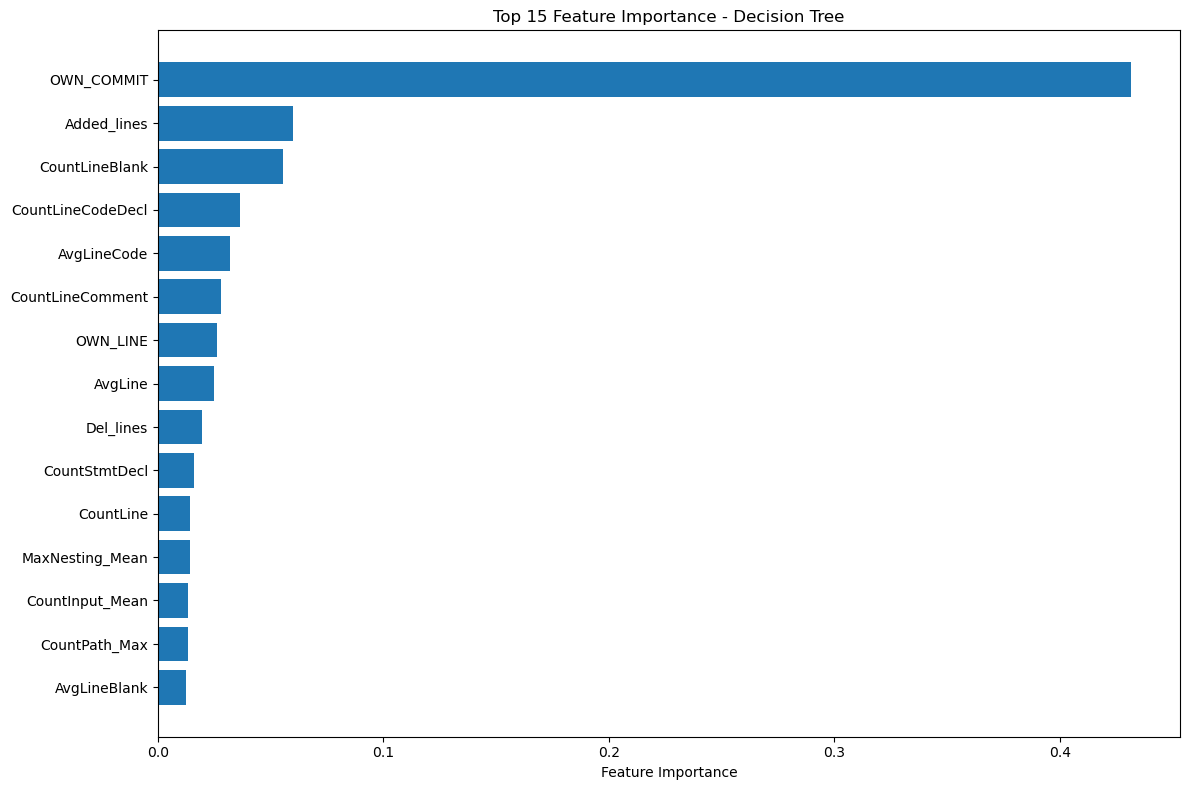


Cumulative Importance Analysis:

Top features accounting for ≥85% cumulative importance:

20 features explain 0.8528 of total importance:
  OWN_COMMIT                     0.4318
  Added_lines                    0.0598
  CountLineBlank                 0.0554
  CountLineCodeDecl              0.0366
  AvgLineCode                    0.0320
  CountLineComment               0.0278
  OWN_LINE                       0.0261
  AvgLine                        0.0251
  Del_lines                      0.0195
  CountStmtDecl                  0.0160
  CountLine                      0.0142
  MaxNesting_Mean                0.0141
  CountInput_Mean                0.0135
  CountPath_Max                  0.0135
  AvgLineBlank                   0.0123
  CountInput_Min                 0.0118
  CountLineCode                  0.0116
  RatioCommentToCode             0.0112
  CountSemicolon                 0.0107
  CountOutput_Max                0.0098


In [22]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 15 Most Important Features:")
print("=" * 40)
for i, row in feature_importance.head(15).iterrows():
    print(f"{row['feature']:<30} {row['importance']:.4f}")

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importance - Decision Tree')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"\nCumulative Importance Analysis:")
cumulative_importance = feature_importance['importance'].cumsum()

print(f"\nTop features accounting for ≥85% cumulative importance:")
for i, cum_imp in enumerate(cumulative_importance):
    if cum_imp >= 0.85:
        top_85_features = feature_importance.head(i+1)
        print(f"\n{i+1} features explain {cum_imp:.4f} of total importance:")
        for idx, row in top_85_features.iterrows():
            print(f"  {row['feature']:<30} {row['importance']:.4f}")
        break
    

## Tree Structure Analysis

In [18]:
# Analyze tree structure
tree = dt_model.tree_

print("Decision Tree Structure Analysis:")
print("=" * 40)
print(f"Maximum depth: {tree.max_depth}")
print(f"Number of leaves: {tree.n_leaves}")
print(f"Total nodes: {tree.node_count}")
print(f"\nTree Complexity:")
if tree.max_depth <= 10:
    print(f"- Shallow tree (depth ≤ 10): Good interpretability")
elif tree.max_depth <= 20:
    print(f"- Medium tree (10 < depth ≤ 20): Moderate interpretability")
else:
    print(f"- Deep tree (depth > 20): Limited interpretability, risk of overfitting")

print(f"\nLeaf Distribution:")
print(f"- Average samples per leaf: {X_train.shape[0] / tree.n_leaves:.1f}")
print(f"- Leaf density: {tree.n_leaves / tree.node_count * 100:.1f}%")

# Show sample decision path (first few nodes)
print(f"\nSample Decision Rules (first 5 splits):")
feature_names = X_train.columns
for i in range(min(5, tree.node_count)):
    if tree.children_left[i] != tree.children_right[i]:  # Not a leaf
        feature_idx = tree.feature[i]
        threshold = tree.threshold[i]
        feature_name = feature_names[feature_idx]
        print(f"Node {i}: If {feature_name} <= {threshold:.4f}")

Decision Tree Structure Analysis:
Maximum depth: 15
Number of leaves: 137
Total nodes: 273

Tree Complexity:
- Medium tree (10 < depth ≤ 20): Moderate interpretability

Leaf Distribution:
- Average samples per leaf: 11.0
- Leaf density: 50.2%

Sample Decision Rules (first 5 splits):
Node 0: If OWN_COMMIT <= 0.8517
Node 1: If CountLineCodeDecl <= -0.1971
Node 2: If AvgLineCode <= -0.3267
Node 3: If CountLine <= -0.4187
Node 4: If OWN_LINE <= -0.7501


## Summary

In [19]:
# Summary of results
print("Decision Tree Classification Summary for ActiveMQ 5.0.0")
print("=" * 60)
print(f"Dataset: ActiveMQ 5.0.0 (HCBOU-balanced)")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Features: {X_train.shape[1]}")
print(f"\nDecision Tree Configuration:")
print(f"- Algorithm: Decision Tree Classifier")
print(f"- Criterion: {dt_model.criterion}")
print(f"- Max depth: {dt_model.tree_.max_depth} (actual)")
print(f"- Total nodes: {dt_model.tree_.node_count}")
print(f"- Number of leaves: {dt_model.tree_.n_leaves}")
print(f"\nPerformance:")
print(f"- Accuracy: {accuracy:.4f}")
print(f"- Precision: {precision:.4f}")
print(f"- Recall: {recall:.4f}")
print(f"- F1-Score: {f1:.4f}")
print(f"\nModel Characteristics:")
print(f"- Highly interpretable with clear decision rules")
print(f"- Provides feature importance rankings")
print(f"- No assumptions about data distribution")
print(f"- Can handle non-linear relationships")
print(f"- Fast training and prediction")
print(f"\nTop 3 Most Important Features:")
for i, row in feature_importance.head(3).iterrows():
    print(f"- {row['feature']}: {row['importance']:.4f}")

Decision Tree Classification Summary for ActiveMQ 5.0.0
Dataset: ActiveMQ 5.0.0 (HCBOU-balanced)
Training samples: 1506
Test samples: 377
Features: 65

Decision Tree Configuration:
- Algorithm: Decision Tree Classifier
- Criterion: gini
- Max depth: 15 (actual)
- Total nodes: 273
- Number of leaves: 137

Performance:
- Accuracy: 0.8462
- Precision: 0.5063
- Recall: 0.6780
- F1-Score: 0.5797

Model Characteristics:
- Highly interpretable with clear decision rules
- Provides feature importance rankings
- No assumptions about data distribution
- Can handle non-linear relationships
- Fast training and prediction

Top 3 Most Important Features:
- OWN_COMMIT: 0.4318
- Added_lines: 0.0598
- CountLineBlank: 0.0554
